In [1]:
import numpy as np
import pandas as pd
import os, sys, cv2, math
from tqdm import tqdm

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.callbacks import LambdaCallback, EarlyStopping
from keras.models import load_model

from sklearn.model_selection import train_test_split
from sklearn.metrics import fbeta_score

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

sys.path.append("../")
from utils.data_utils import *

Using TensorFlow backend.


In [2]:
img_size = 256
df_train = pd.read_csv('../inputs/train_v2.csv')
labels, label_map, inv_label_map = get_labels()
X, Y = load_data(df_train, '../inputs/train-jpg', label_map, img_size=img_size)
print(X.shape)
print(Y.shape)

100%|██████████| 40479/40479 [01:30<00:00, 449.50it/s]


Creating numpy array for data...
(40479, 256, 256, 3)
(40479, 17)


In [3]:
# Split data to train and validation set with proportions of 80%/20%
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.2, random_state=0)

In [4]:
model_path = '../models/resnet50_1_256_binary_crossentropy_rmsprop_synt_medium/resnet50_1_27_0.09.h5'
model = load_model(model_path)

In [5]:
pred = model.predict(X_valid)
pred = (pred > 0.2).astype(int)

In [6]:
labels, lmap, i_lmap = get_labels()
pred_tags = to_tagging(pred, i_lmap)
gt_tags = to_tagging(Y_valid, i_lmap)
val_res_df = pd.DataFrame(columns=['ground truth', 'predicted'])
val_res_df['ground truth'] = gt_tags['tags']
val_res_df['predicted'] = pred_tags['tags']
val_res_df.head(10)

,ground truth,predicted
0,clear habitation primary road,agriculture clear habitation primary road
1,agriculture partly_cloudy primary water,agriculture partly_cloudy primary
2,bare_ground habitation partly_cloudy primary road,agriculture partly_cloudy primary road
3,clear primary road water,clear primary road water
4,agriculture clear cultivation habitation prima...,agriculture clear cultivation primary
5,cloudy,cloudy
6,cloudy,cloudy
7,blooming clear primary,clear primary
8,partly_cloudy primary,partly_cloudy primary
9,clear primary,clear partly_cloudy primary


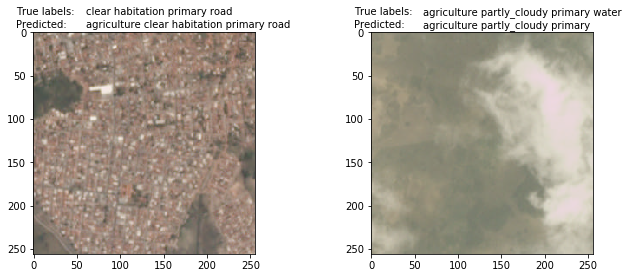

In [79]:
def show_examples(idx_list, zoom=2):
    num = len(idx_list)
    data = X_valid[idx_list]
    fig = plt.figure()
    fig.set_figheight(num*zoom)
    fig.set_figwidth(zoom)
    for i in range(num):
        img = (255*data[i]).astype(np.uint8)
        ax = fig.add_subplot(int('1%d%d'% (num, i+1)))
        ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax.text(-20, -20, ('True labels: '))
        ax.text(60, -20, (val_res_df['ground truth'][idx_list[i]]))
        ax.text(-20, -5, ('Predicted: '))
        ax.text(60, -5, (val_res_df['predicted'][idx_list[i]]))
    plt.tight_layout(w_pad=zoom)
    
show_examples([0,1], zoom=8.5)

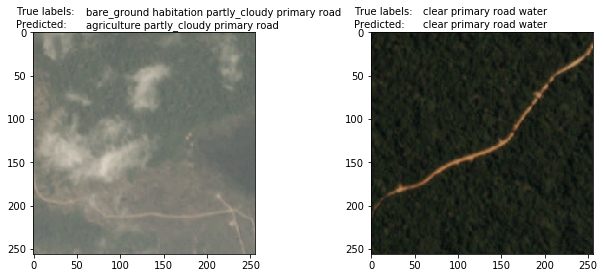

In [80]:
show_examples([2,3], zoom=8.5)

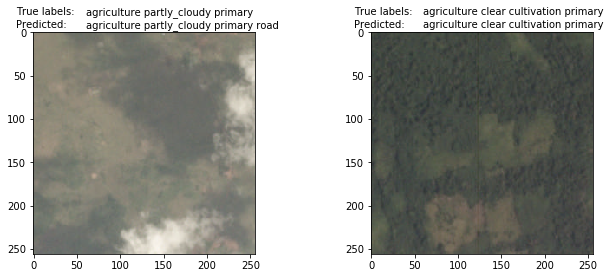

In [81]:
show_examples([13,14], zoom=8.5)